Analysis done working through tutorial at:


https://pv-tutorials.github.io/2024_PVSC/Tutorial%201%20-%20TMY%20Weather%20Data.html

In [584]:
import pvlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [592]:
# Open weather data from an epw file
# Downloaded from https://re.jrc.ec.europa.eu/pvg_tools/en/
# See user manual at https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis/getting-started-pvgis/pvgis-user-manual_en
df_tmy = pd.read_csv('data/PVGIS_tmy_data.csv', index_col=0, parse_dates=True)

In [593]:
# the TMY data contains a row for every hour of the year the index currently shows with true year the data was recorded
# this is because the TMY takes the [median?] of the data since 2005 to 2023
# to ease data visualisation I will override the index year value to a dummy of 2024
# df_tmy.index = df_tmy.index.map(lambda x: x.replace(year=2024))
# df_tmy.index = df_tmy.index + pd.Timedelta(hours=1)
# df = df.loc['2024-05-10':'2024-05-20']
display(df_tmy.head(20))
display(df_tmy.keys())
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))


,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2018-01-01 00:00:00+00:00,6.00,82.79,0.0,0.00,0.0,296.99,4.79,258.0,97580.0
2018-01-01 01:00:00+00:00,5.71,82.47,0.0,0.00,0.0,292.74,5.04,251.0,97670.0
2018-01-01 02:00:00+00:00,5.41,82.14,0.0,0.00,0.0,288.50,5.28,247.0,97700.0
2018-01-01 03:00:00+00:00,5.12,81.82,0.0,0.00,0.0,284.25,5.53,244.0,97730.0
2018-01-01 04:00:00+00:00,4.83,81.49,0.0,0.00,0.0,280.01,5.77,243.0,97710.0
2018-01-01 05:00:00+00:00,4.53,81.17,0.0,0.00,0.0,275.76,6.02,237.0,97650.0
2018-01-01 06:00:00+00:00,4.24,80.84,0.0,0.00,0.0,271.51,6.26,227.0,97580.0
2018-01-01 07:00:00+00:00,3.94,80.52,0.0,0.00,0.0,267.27,6.51,210.0,97450.0
2018-01-01 08:00:00+00:00,4.12,85.50,0.0,0.00,0.0,275.75,3.31,199.0,97380.0


Index(['temp_air', 'relative_humidity', 'ghi', 'dni', 'dhi', 'IR(h)',
       'wind_speed', 'wind_direction', 'pressure'],
      dtype='object')

Number of rows: 8760
Number of columns: 9


In [594]:
# ghi, dhi, dni are irradiance measurements, temp_air is the air temperature, and wind_speed is the wind speed.
df_tmy = df_tmy[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
df_tmy.columns = ['GHI', 'DHI', 'DNI', 'Temperature', 'Wind Speed'] # rename columns to be more readable

df_tmy.head(20)

,GHI,DHI,DNI,Temperature,Wind Speed
time(UTC),,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.00,6.00,4.79
2018-01-01 01:00:00+00:00,0.0,0.0,0.00,5.71,5.04
2018-01-01 02:00:00+00:00,0.0,0.0,0.00,5.41,5.28
2018-01-01 03:00:00+00:00,0.0,0.0,0.00,5.12,5.53
2018-01-01 04:00:00+00:00,0.0,0.0,0.00,4.83,5.77
2018-01-01 05:00:00+00:00,0.0,0.0,0.00,4.53,6.02
2018-01-01 06:00:00+00:00,0.0,0.0,0.00,4.24,6.26
2018-01-01 07:00:00+00:00,0.0,0.0,0.00,3.94,6.51
2018-01-01 08:00:00+00:00,0.0,0.0,0.00,4.12,3.31


In [597]:
# The April data that PV-GIS provides comes from 2007 which is the sunniest April in recent history!
# I cannot explain why this is happening but it is clear this is not a 'typical' April.
# Instead I will import all the historical hourly data from 2005 to 2023
# determine the median month for total GHI and construct my own TMY.

# import csv from PV-GIS

# Define the file path
input_file = 'data/PVGIS_hourly_data_historical.csv'

# Read the CSV file, skipping the first two rows and parsing dates
df_historical = pd.read_csv(input_file, parse_dates=True, index_col=0)

# Truncate the minutes to the nearest hour
truncated_index = df_historical.index.floor('H')

# Calculate how much the time has been truncated by
time_truncated_by = df_historical.index - truncated_index

# Apply the truncated index to the DataFrame
df_historical.index = truncated_index


# Display the first few rows of the processed DataFrame
df_historical.loc['2018-01-01':].head(20)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/2308708576.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  truncated_index = df_historical.index.floor('H')


,GHI,DNI,DHI,Temperature,Wind Speed
0,,,,,
2018-01-01 00:00:00,0.00,0.00,0.00,5.14,6.41
2018-01-01 01:00:00,0.00,0.00,0.00,4.68,6.69
2018-01-01 02:00:00,0.00,0.00,0.00,4.60,6.97
2018-01-01 03:00:00,0.00,0.00,0.00,4.52,6.97
2018-01-01 04:00:00,0.00,0.00,0.00,5.08,7.03
2018-01-01 05:00:00,0.00,0.00,0.00,5.09,6.14
2018-01-01 06:00:00,0.00,0.00,0.00,4.89,5.38
2018-01-01 07:00:00,0.00,0.00,0.00,4.28,3.93
2018-01-01 08:00:00,0.00,0.00,0.00,4.12,3.31


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-31 14:00:00', '2018-01-31 15:00:00',
               '2018-01-31 16:00:00', '2018-01-31 17:00:00',
               '2018-01-31 18:00:00', '2018-01-31 19:00:00',
               '2018-01-31 20:00:00', '2018-01-31 21:00:00',
               '2018-01-31 22:00:00', '2018-01-31 23:00:00'],
              dtype='datetime64[ns]', name='time(UTC)', length=744, freq=None)


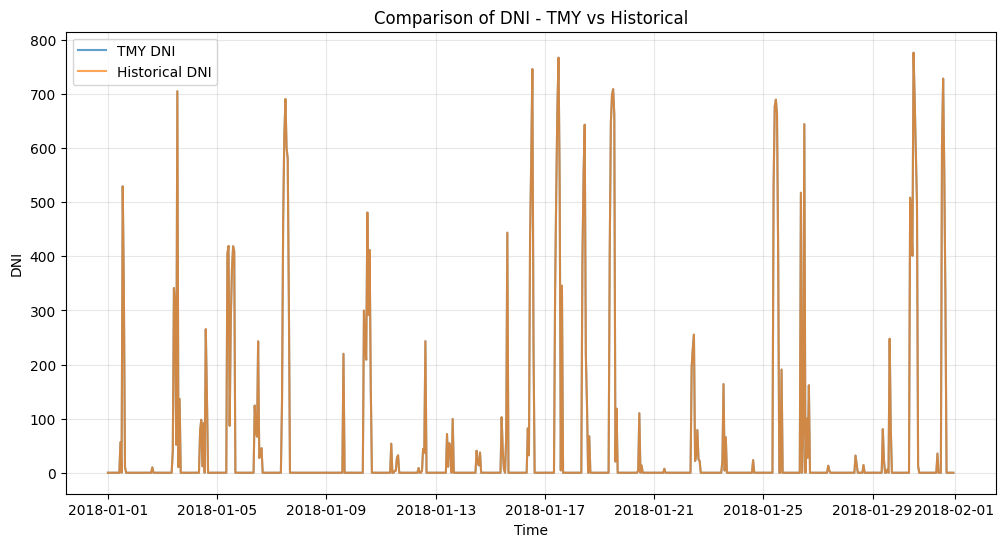

time(UTC)
2018-01-01 00:00:00    0.0
2018-01-01 01:00:00    0.0
2018-01-01 02:00:00    0.0
2018-01-01 03:00:00    0.0
2018-01-01 04:00:00    0.0
2018-01-01 05:00:00    0.0
2018-01-01 06:00:00    0.0
2018-01-01 07:00:00    0.0
2018-01-01 08:00:00    0.0
2018-01-01 09:00:00    0.0
2018-01-01 10:00:00    0.0
2018-01-01 11:00:00    0.0
2018-01-01 12:00:00    0.0
2018-01-01 13:00:00    0.0
2018-01-01 14:00:00    0.0
2018-01-01 15:00:00    0.0
2018-01-01 16:00:00    0.0
2018-01-01 17:00:00    0.0
2018-01-01 18:00:00    0.0
2018-01-01 19:00:00    0.0
Name: DNI, dtype: float64

,TMY DNI,Historical DNI,Difference
time(UTC),,,
2018-01-01 00:00:00,0.00,0.00,0.0
2018-01-01 01:00:00,0.00,0.00,0.0
2018-01-01 02:00:00,0.00,0.00,0.0
2018-01-01 03:00:00,0.00,0.00,0.0
2018-01-01 04:00:00,0.00,0.00,0.0
2018-01-01 05:00:00,0.00,0.00,0.0
2018-01-01 06:00:00,0.00,0.00,0.0
2018-01-01 07:00:00,0.00,0.00,0.0
2018-01-01 08:00:00,0.00,0.00,0.0


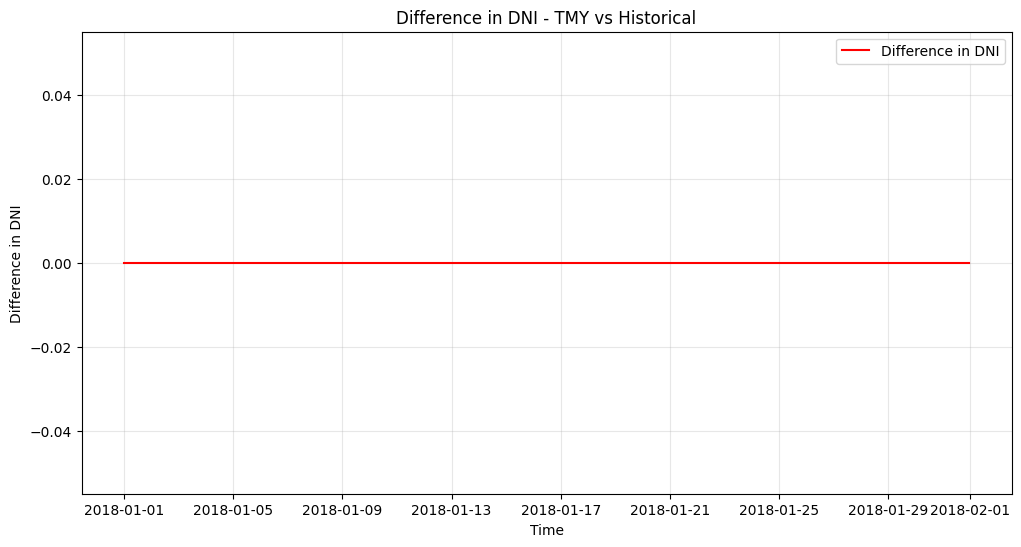

In [599]:
month = 1
year = 2018
df_filtered = df_tmy[(df_tmy.index.month == month) & (df_tmy.index.year == 2018)]
df_filtered.index = df_filtered.index.tz_localize(None)
df_historical_filtered = df_historical[:-1].loc[df_filtered.index]
print(df_filtered.index)

compare = 'DNI'
# Plot the comparison of the two series
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered[compare], label=f'TMY {compare}', alpha=0.7)
plt.plot(df_historical_filtered.index, df_historical_filtered[compare], label=f'Historical {compare}', alpha=0.7)
plt.legend()
plt.title(f'Comparison of {compare} - TMY vs Historical')
plt.xlabel('Time')
plt.ylabel(compare)
plt.grid(alpha=0.3)
plt.show()

# Calculate the difference between the two series
difference = df_filtered[compare] - df_historical_filtered[compare]
display(difference.head(20))

# Create a DataFrame to see side by side the two datasets and the differences
comparison_df = pd.DataFrame({
    f'TMY {compare}': df_filtered[compare],
    f'Historical {compare}': df_historical_filtered[compare],
    'Difference': difference
})
display(comparison_df.head(20))

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(difference, label=f'Difference in {compare}', color='red')
plt.legend()
plt.title(f'Difference in {compare} - TMY vs Historical')
plt.xlabel('Time')
plt.ylabel(f'Difference in {compare}')
plt.grid(alpha=0.3)
plt.show()

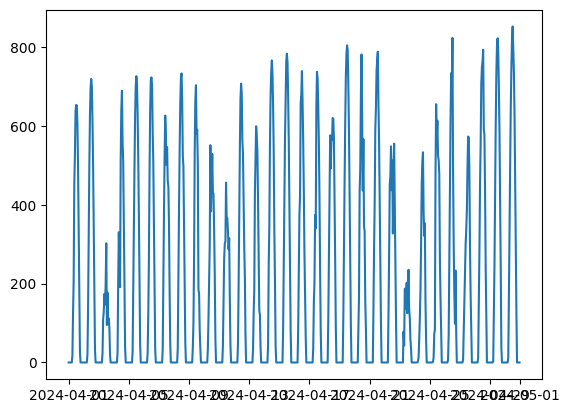

In [536]:
df_jan = df_tmy[df_tmy.index.month == 4]
df_jan.head()
# show the first 15 rows:
plt.plot(df_jan['GHI'])

In [537]:
# select data source!
# df = df_tmy
df = df_historical[df_historical.index.year == 2023]

,GHI,DNI,DHI,Temperature,Wind Speed
0,,,,,
2023-01-01 00:00:00,0.00,0.00,0.0,9.69,6.83
2023-01-01 01:00:00,0.00,0.00,0.0,9.00,6.69
2023-01-01 02:00:00,0.00,0.00,0.0,8.60,6.48
2023-01-01 03:00:00,0.00,0.00,0.0,8.34,6.41
2023-01-01 04:00:00,0.00,0.00,0.0,7.82,6.41
2023-01-01 05:00:00,0.00,0.00,0.0,7.73,6.21
2023-01-01 06:00:00,0.00,0.00,0.0,7.61,5.79
2023-01-01 07:00:00,0.00,0.00,0.0,7.93,5.59
2023-01-01 08:00:00,0.00,0.00,0.0,7.92,5.31


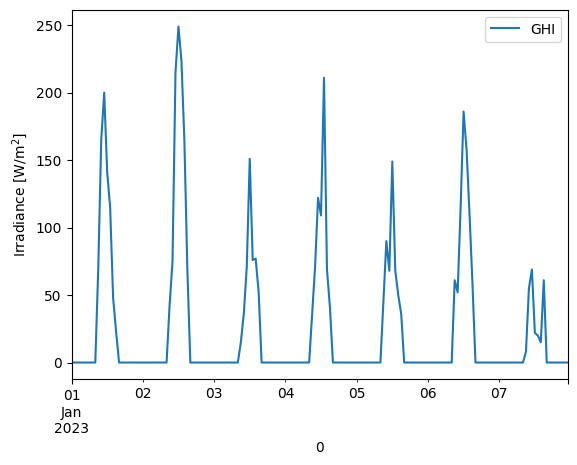

In [538]:
# Plotting the three irradiance fields

first_week = df.head(24*7) # Plotting 7 days, each one has 24 hours or entries
# first_week[['GHI', 'DHI', 'DNI']].plot()
first_week[['GHI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

df.head(20)

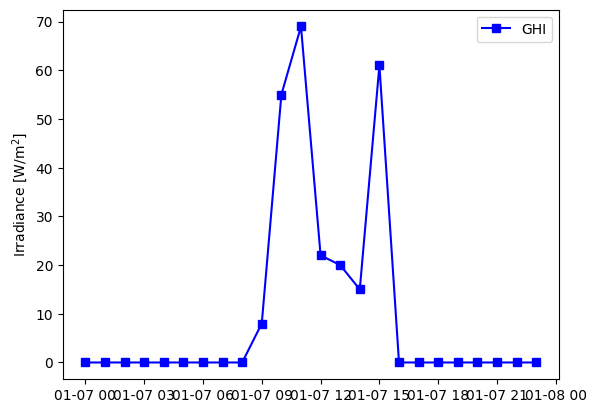

In [539]:
birthday = df.loc['2023-01-07':'2023-01-07']
# plt.plot(birthday['DNI'], color='r') 
# plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');
# plt.legend(['DNI', 'DHI', 'GHI'])
plt.legend(['GHI'])

Text(0.5, 0, '')

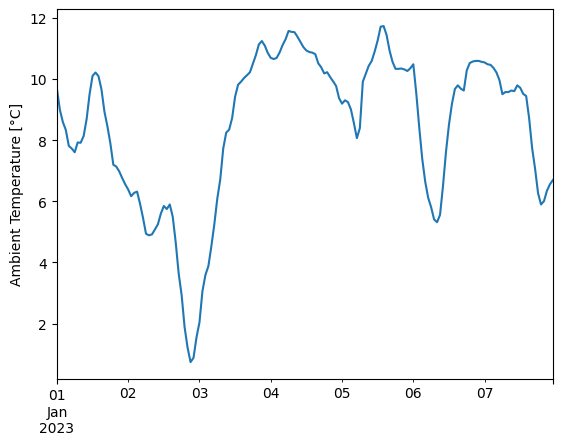

In [540]:
first_week['Temperature'].plot()
plt.ylabel('Ambient Temperature [°C]');
plt.xlabel(None)

Text(0.5, 0, '')

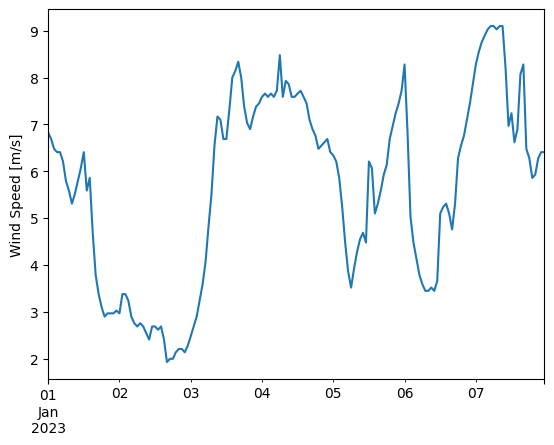

In [541]:
first_week['Wind Speed'].plot()
plt.ylabel('Wind Speed [m/s]')
plt.xlabel(None)

In [542]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('M').sum()
monthly_ghi.head(12)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/2694762132.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ghi = df['GHI'].resample('M').sum()


0
2023-01-31     29353.13
2023-02-28     39709.95
2023-03-31     63931.66
2023-04-30    112274.61
2023-05-31    176319.41
2023-06-30    184453.60
2023-07-31    142985.25
2023-08-31    136128.53
2023-09-30     97163.93
2023-10-31     60031.40
2023-11-30     30470.58
2023-12-31     15292.52
Freq: ME, Name: GHI, dtype: float64

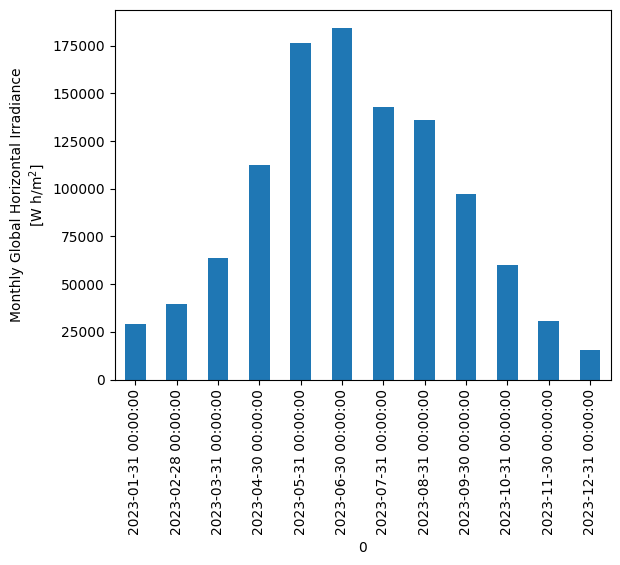

In [543]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/371858129.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()


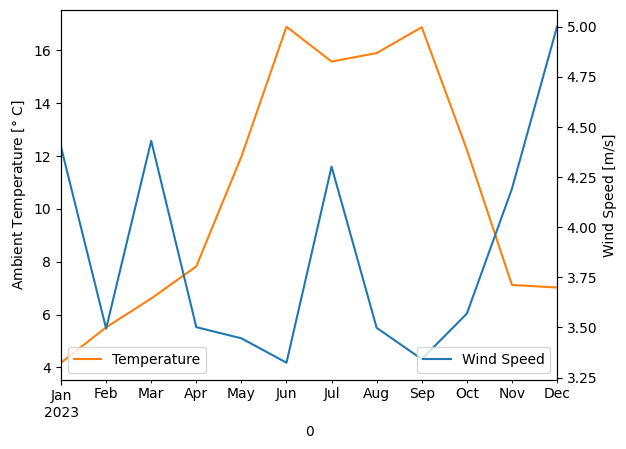

In [544]:
# Taking monthly averages instead of sums.

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()
monthly_average_temp_wind['Temperature'].plot(ax=ax1, c='tab:orange')
monthly_average_temp_wind['Wind Speed'].plot(ax=ax2, c='tab:blue')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/3364017138.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_DNI = df[['DNI']].resample('M').mean()  # Add the column name, and resample by day. Month is 'M', day is..


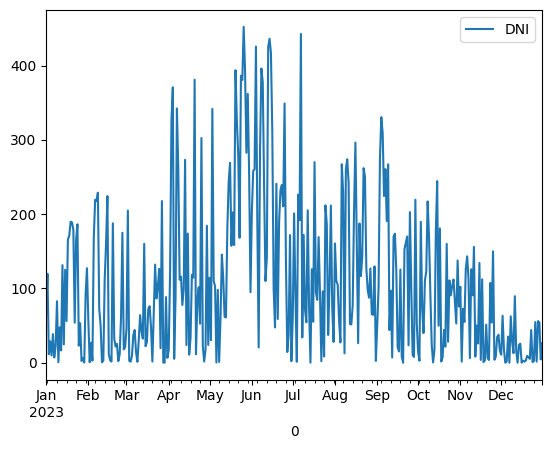

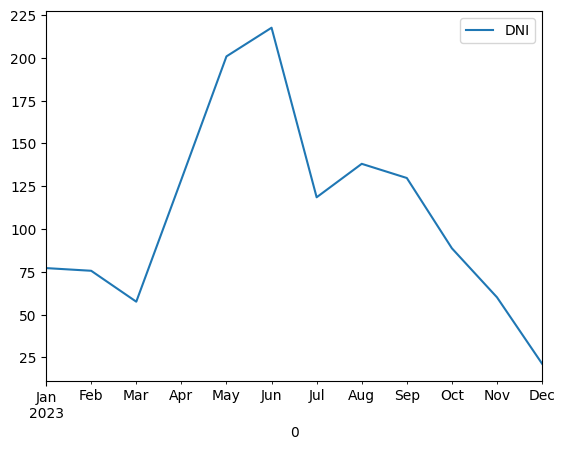

In [545]:
# Average DNI by DAY and by MONTH

try:
    daily_average_DNI = df[['DNI']].resample('D').mean()
    monthly_average_DNI = df[['DNI']].resample('M').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
    monthly_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

## Calculate Sun Position

- First we need to set our location to match the location from our EPW weather data.

- Then we calculate the position of the sun in the sky for each timepoint throughout the year at that location.

In [546]:
# make a Location object corresponding to this TMY
location = pvlib.location.Location(latitude=metadata['latitude'],
                                   longitude=metadata['longitude'])

# shift timestamps if necessary from the TMY file to match the solar position calculations
times = df.index - pd.Timedelta('49min')
solar_position = location.get_solarposition(times)
solar_position.index += pd.Timedelta('49min') # but remember to shift the index back to line up with the TMY data:

- Now we calculate the irradiance on the *titled solar array* which is the sum of the direct normal irradiance (DNI) and the diffuse horizontal irradiance (DHI) that strike the solar array. This is called the total plane-of-array irradiance (POA). The POA irradiance is the input to the PV power model.

- This calculation is doe using the `pvlib.irradiance.get_total_irradiance()` function.

- Here i am running the calculation at a variety of tilt angles (from 0 to 45deg) to see the sensitivity.

In [547]:
poas = {}  # Use a dictionary to store DataFrames for each tilt angle

for tilt in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]:
    # Calculate the total irradiance for the given tilt angle
    poa = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,  # Tilt angle
        surface_azimuth=90,  # Facing South
        dni=df['DNI'],
        ghi=df['GHI'],
        dhi=df['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )
    
    # Store the resulting DataFrame in the dictionary with the tilt as the key
    poas[tilt] = poa

# Access individual DataFrames by tilt angle, e.g., poas[10] for tilt=10

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/2055563732.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_tilts.resample('M').sum()


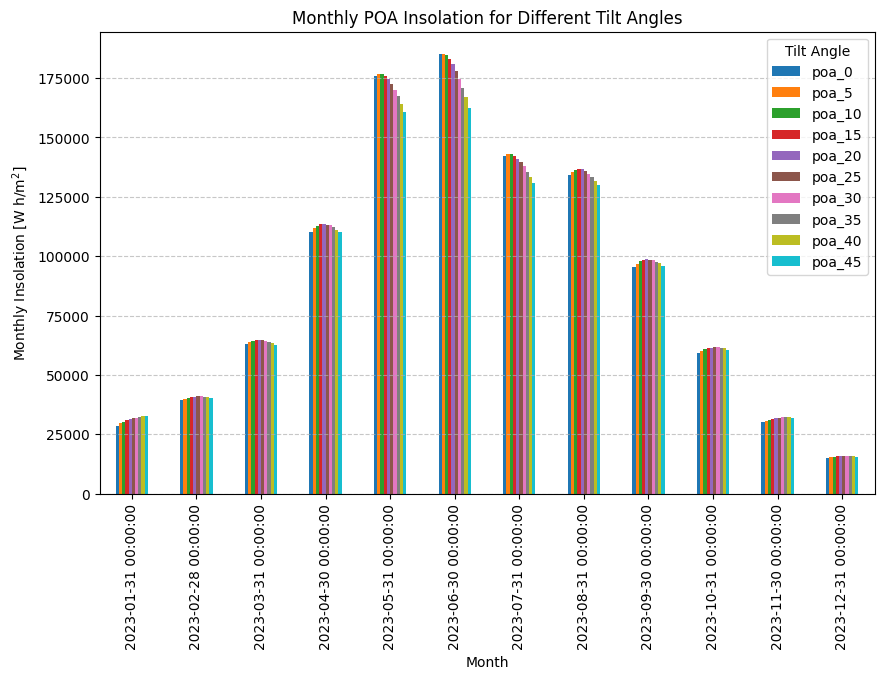

In [548]:
# Create a DataFrame with POA global values for all tilt angles in the dictionary
df_tilts = pd.DataFrame({f'poa_{tilt}': poas[tilt]['poa_global'] for tilt in poas})

# Resample the data to monthly sums
df_monthly = df_tilts.resample('M').sum()

# Plot the monthly insolation as a bar chart
df_monthly.plot.bar(figsize=(10, 6))
plt.ylabel('Monthly Insolation [W h/m$^2$]')
plt.title('Monthly POA Insolation for Different Tilt Angles')
plt.xlabel('Month')
plt.legend(title='Tilt Angle')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Model the Temperature of the Panels

We already have the weather data providing the air temperature. However we need to know the temperature
of the solar panels themselves, as this is a critical input to determine the power production.

The temperature of the solar panels depends on many factors, and we will use an established model to estimate the temperature at each timepoint based on these factors:

- air temperature
- wind speed
- solar irradiance (DNI)
- the type of solar panel
- the panel's mounting configuration


In [549]:
all_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())

['open_rack_glass_glass',
 'close_mount_glass_glass',
 'open_rack_glass_polymer',
 'insulated_back_glass_polymer']

In [550]:
tilt = 15  # choose a tilt angle from tilts used above
parameters = all_parameters['open_rack_glass_glass']
display(parameters)
# note the "splat" operator "**" which expands the dictionary "parameters"
# into a comma separated list of keyword arguments
cell_temperature = pvlib.temperature.sapm_cell(
    df_tilts[f'poa_{tilt}'], df['Temperature'], df['Wind Speed'], **parameters)

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

In [527]:
# Now we can plot the cell temperature against the ambient temperature

df['Temperature'].head(24*7).plot()
cell_temperature.head(24*7).plot()
plt.grid()
plt.legend(['Air Temperature', 'Cell Temperature'])
# # note Python 3 can use unicode characters like the degrees symbol
plt.ylabel('Temperature [°C]')

KeyError: 'Temperature'

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/1896444585.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Temperature rise above ambient [$\degree C$]')


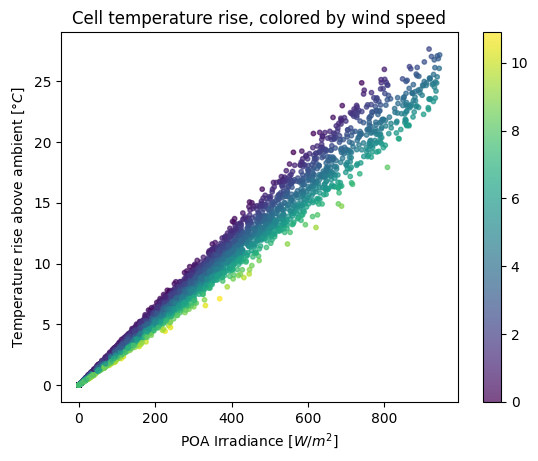

In [ ]:
temperature_difference = cell_temperature - df['Temperature']
plt.scatter(poas[tilt]['poa_global'], temperature_difference, c=df['Wind Speed'], s=10, alpha=0.7)
plt.colorbar()
# note you can use LaTeX math in matplotlib labels
# compare \degree" with the unicode symbol above
plt.ylabel('Temperature rise above ambient [$\degree C$]')
plt.xlabel('POA Irradiance [$W/m^2$]');
plt.title('Cell temperature rise, colored by wind speed');

## Power Generation Calculation

We will start by creating a PVWatts model to calculate the power generation.

In [528]:
# Assume a 1kW nameplate module with a 0.4% temperature coefficient
gamma_pdc = -0.4 / 100.0  # divide by 100 to go from %/°C to 1/°C
nameplate = 100e3

array_power = pvlib.pvsystem.pvwatts_dc(poas[tilt]['poa_global'], cell_temperature, nameplate, gamma_pdc)


Text(0, 0.5, 'Array Power [W]')

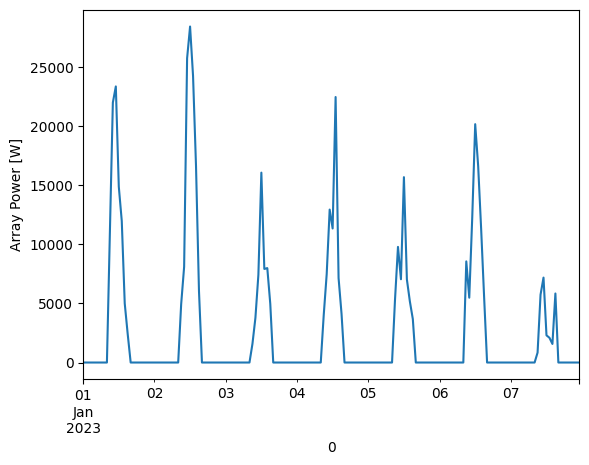

In [523]:
array_power.head(24*7).plot()
plt.ylabel('Array Power [W]')

In [524]:
plt.scatter(poas[tilt]['poa_global'], array_power, c=df['Temperature'], s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by amb. temp.');

KeyError: 'Temperature'

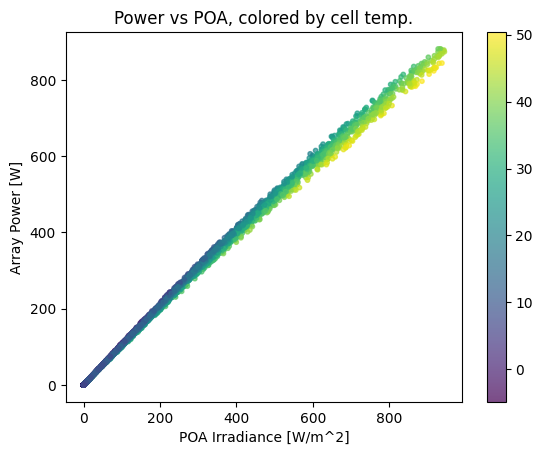

In [ ]:
plt.scatter(poas[tilt]['poa_global'], array_power, c=cell_temperature, s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by cell temp.');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/1772266676.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_plot.resample('M').sum().plot.bar()
/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/1772266676.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_production = df_plot['Production'].resample('M').sum() / 1000  # Convert Wh to kWh


,Monthly Production (kWh)
0,
2023-01-31 00:00:00,3272.637809
2023-02-28 00:00:00,4244.313695
2023-03-31 00:00:00,6670.232692
2023-04-30 00:00:00,11455.117382
2023-05-31 00:00:00,17248.123533
2023-06-30 00:00:00,17499.847139
2023-07-31 00:00:00,13961.071385
2023-08-31 00:00:00,13354.549513
2023-09-30 00:00:00,9563.150103


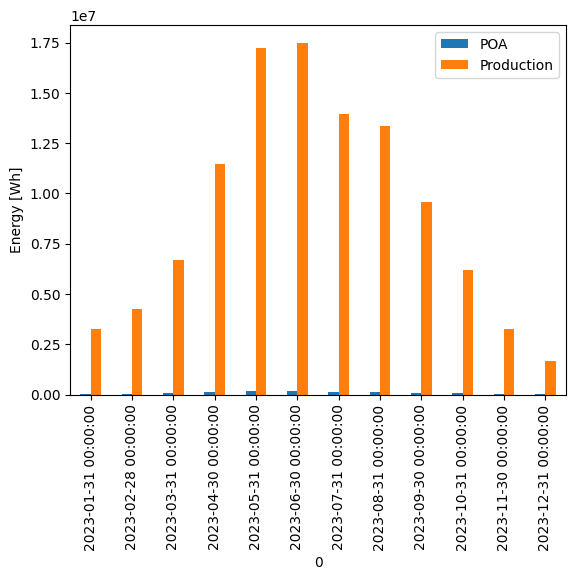

In [525]:
# Compare monthly energy production vs insolation

df_plot = pd.DataFrame({
    'POA': poas[tilt]['poa_global'],
    'Production': array_power,
})
# summing hourly power (W) gives (W h)
df_plot.resample('M').sum().plot.bar()
plt.ylabel('Energy [Wh]')

# Calculate monthly production in kWh
monthly_production = df_plot['Production'].resample('M').sum() / 1000  # Convert Wh to kWh
annual_total = monthly_production.sum()
# Create a DataFrame to display monthly totals and the annual total
df_summary = pd.DataFrame({
    'Monthly Production (kWh)': monthly_production
})
df_summary.loc['Annual Total'] = df_summary['Monthly Production (kWh)'].sum()
display(df_summary)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/3150943844.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_historical = df_historical['Production'].resample('M').sum()


,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2005-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN
2005-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN


/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/3150943844.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tmy = df_tmy['Production'].resample('M').sum()


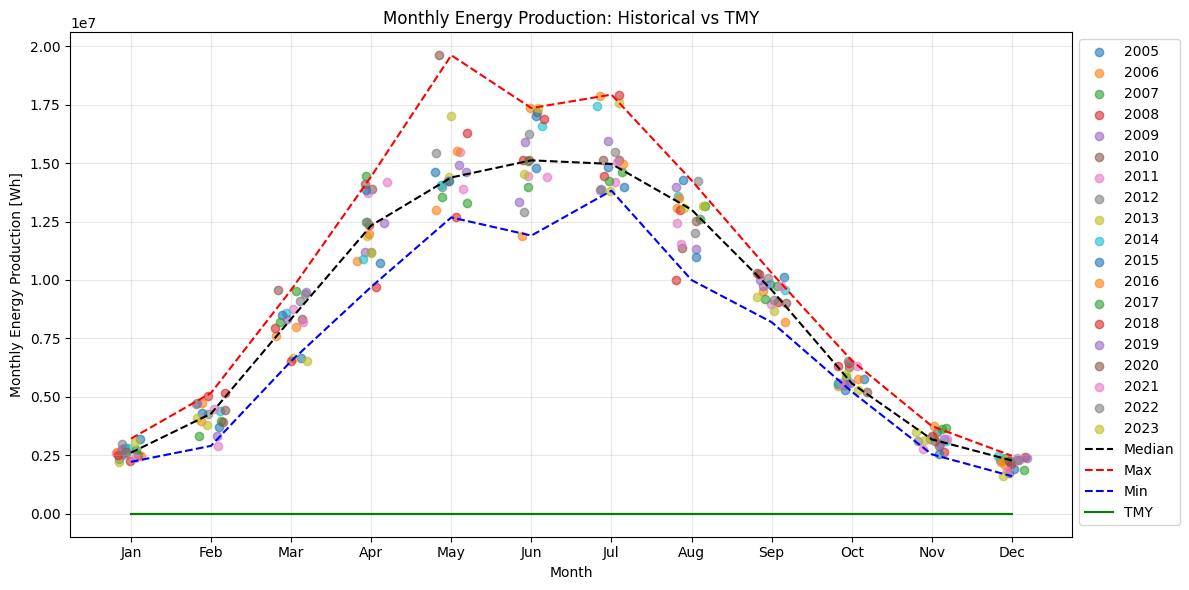

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/3150943844.py:123: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_historical = df_historical['Production'].resample('Y').sum()


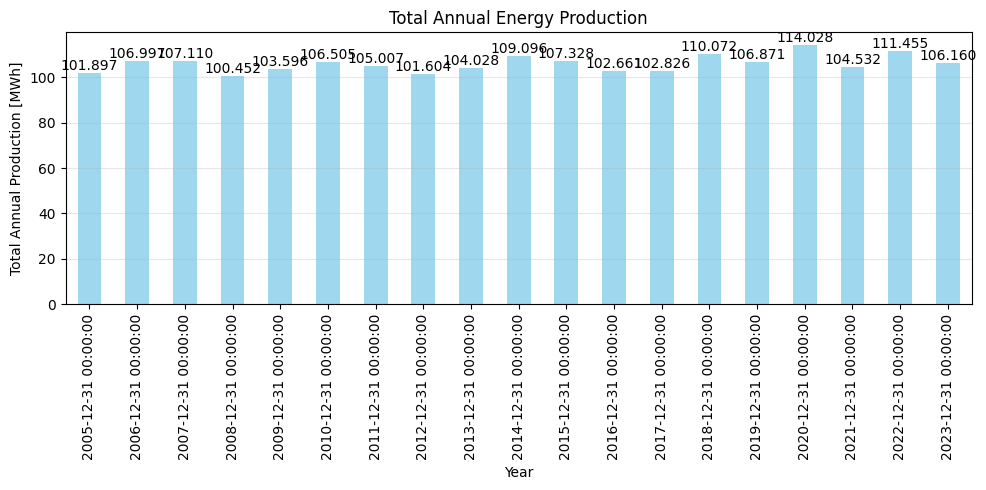

In [ ]:
def plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=15, kWp=1000):
    """
    Plots the monthly energy production for all years in df_historical and the TMY as a separate data series.
    Includes POA and temperature analysis, and considers 50% of panels oriented at 90° and 50% at 270°.

    Parameters:
    - df_historical: DataFrame containing historical data with a datetime index.
    - df_tmy: DataFrame containing TMY data with a datetime index.
    - tilt_angle: Tilt angle of the panels (default is 15°).
    - column: The column to use for energy production (default is 'GHI').
    """
    # Ensure datetime index is timezone-naive
    df_historical.index = df_historical.index.tz_localize(None)
    df_tmy.index = df_tmy.index.tz_localize(None)
    # Calculate solar position
    location = pvlib.location.Location(latitude=metadata['latitude'], longitude=metadata['longitude'])
    solar_position = location.get_solarposition(df_historical.index)

    # Calculate POA irradiance for both orientations (90° and 270° azimuth)
    poa_90 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=90,
        dni=df_historical['DNI'],
        ghi=df_historical['GHI'],
        dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )['poa_global']

    poa_270 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=270,
        dni=df_historical['DNI'],
        ghi=df_historical['GHI'],
        dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )['poa_global']

    # Average the POA irradiance for both orientations
    df_historical['POA'] = (poa_90 + poa_270) / 2

    # Calculate cell temperature
    parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    df_historical['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_historical['POA'], df_historical['Temperature'], df_historical['Wind Speed'], **parameters
    )

    # Calculate monthly energy production
    gamma_pdc = -0.004  # Temperature coefficient
    nameplate_capacity = kWp  # 1 kW system
    df_historical['Production'] = pvlib.pvsystem.pvwatts_dc(
        df_historical['POA'], df_historical['Cell Temperature'], nameplate_capacity, gamma_pdc
    )

    # Resample historical data to monthly sums
    monthly_historical = df_historical['Production'].resample('M').sum()
    monthly_historical = monthly_historical.to_frame(name='Energy')
    monthly_historical['Year'] = monthly_historical.index.year
    monthly_historical['Month'] = monthly_historical.index.month

    # Resample TMY data to monthly sums
    poa_tmy = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=90,  # Assuming TMY uses a single orientation
        dni=df_tmy['DNI'],
        ghi=df_tmy['GHI'],
        dhi=df_tmy['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )
    display(poa_tmy.head(50))

    df_tmy['POA'] = poa_tmy['poa_global']
    # display(df_tmy.describe())
    df_tmy['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_tmy['POA'], df_tmy['Temperature'], df_tmy['Wind Speed'], **parameters
    )
    df_tmy['Production'] = pvlib.pvsystem.pvwatts_dc(
        df_tmy['POA'], df_tmy['Cell Temperature'], nameplate_capacity, gamma_pdc
    )
    monthly_tmy = df_tmy['Production'].resample('M').sum()
    monthly_tmy.index = monthly_tmy.index.month  # Use month as the index for TMY
    monthly_tmy.name = 'TMY'

    # Calculate median, max, and min for each month in historical data
    monthly_stats = monthly_historical.groupby('Month')['Energy'].agg(['median', 'max', 'min'])

    # Plotting
    plt.figure(figsize=(12, 6))

    # Scatter plot for historical data
    for year, group in monthly_historical.groupby('Year'):
        jitter = np.random.uniform(-0.2, 0.2, size=len(group))  # Add jitter for better visualization
        plt.scatter(group['Month'] + jitter, group['Energy'], label=f'{year}', alpha=0.6)

    # Plot median, max, and min lines
    plt.plot(monthly_stats.index, monthly_stats['median'], 'k--', label='Median')
    plt.plot(monthly_stats.index, monthly_stats['max'], 'r--', label='Max')
    plt.plot(monthly_stats.index, monthly_stats['min'], 'b--', label='Min')

    # Plot TMY as a solid line
    plt.plot(monthly_tmy.index, monthly_tmy.values, 'g-', label='TMY')

    # Add labels, legend, and grid
    plt.xlabel('Month')
    plt.ylabel('Monthly Energy Production [Wh]')
    plt.title('Monthly Energy Production: Historical vs TMY')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage:
# Plot monthly energy production with orientation
plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=15, kWp=100000,)

# Calculate total annual production for each year in historical data
annual_historical = df_historical['Production'].resample('Y').sum()

# Plot total annual production
plt.figure(figsize=(10, 5))
bars = annual_historical_mwh.plot(kind='bar', color='skyblue', alpha=0.8)

# Add data labels on each bar
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.3f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel('Year')
plt.ylabel('Total Annual Production [MWh]')
plt.title('Total Annual Energy Production')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()